In [23]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

data=pd.read_csv(r'F:\courses\AppiedDataAnalysis\FinalProject\Data\cleaned.character.metadata.tsv',sep='\t')

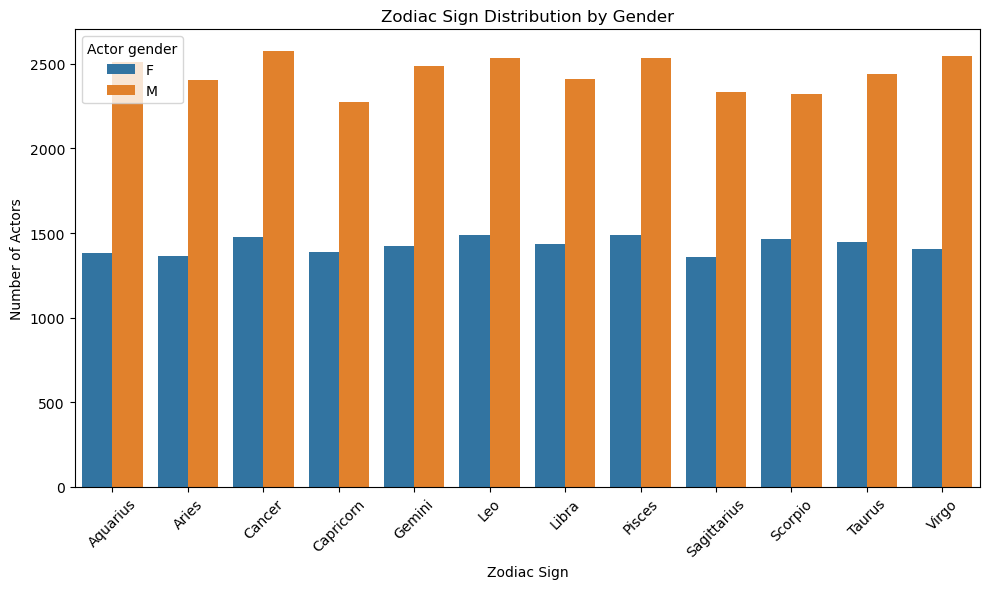

,Zodiac Sign,Actor gender,count
0,Aquarius,F,1380
1,Aquarius,M,2509
2,Aries,F,1363
3,Aries,M,2404
4,Cancer,F,1476
5,Cancer,M,2576
6,Capricorn,F,1388
7,Capricorn,M,2277
8,Gemini,F,1424
9,Gemini,M,2487


In [24]:
Actordata=data[['Actor gender','Freebase actor ID','Zodiac Sign']].drop_duplicates()
def GenderDistributionAnalysis(data):
    zodiac_gender_counts = data.groupby(['Zodiac Sign', 'Actor gender']).size().reset_index(name='count')

    # use seaborn to create bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Zodiac Sign', y='count', hue='Actor gender', data=zodiac_gender_counts)

    # add title and lable
    plt.title('Zodiac Sign Distribution by Gender')
    plt.xlabel('Zodiac Sign')
    plt.ylabel('Number of Actors')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # show the graph
    plt.show()
    
    return zodiac_gender_counts
GenderDistributionAnalysis(Actordata)


In [29]:
def gender_zodiac_chi2_heatmap(df, zodiac_col, gender_col, alpha=0.05):
    """
    Perform chi-square test on the zodiac sign distribution by gender and display a heatmap
    
    Parameters:
    df (DataFrame): DataFrame containing actor, gender, and zodiac sign data
    zodiac_col (str): Column name for zodiac signs
    gender_col (str): Column name for gender (e.g., "Male", "Female")
    alpha (float): Significance level, default is 0.05
    
    Returns:
    None
    """
    # Create a contingency table for zodiac signs by gender
    zodiac_gender_matrix = pd.crosstab(df[gender_col], df[zodiac_col])

    # Perform chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(zodiac_gender_matrix)

    # Output chi-square test results
    print(f'Chi-Squared Test Statistic: {chi2}')
    print(f'P-Value: {p}')

    # Check for significance
    if p < alpha:
        print("There is a significant difference between the zodiac sign distributions of male and female actors.")
    else:
        print("There is no significant difference between the zodiac sign distributions of male and female actors.")
        
gender_zodiac_chi2_heatmap(Actordata,'Zodiac Sign', 'Actor gender')

Chi-Squared Test Statistic: 15.100049628019297
P-Value: 0.17796228180369802
There is no significant difference between the zodiac sign distributions of male and female actors.
